In [102]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "disease_diagnosis.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "s3programmer/disease-diagnosis-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1130893822.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'disease-diagnosis-dataset' dataset.
First 5 records:    Patient_ID  Age  Gender            Symptom_1    Symptom_2 Symptom_3  \
0           1   74    Male              Fatigue  Sore throat     Fever   
1           2   66  Female          Sore throat      Fatigue     Cough   
2           3   32    Male            Body ache  Sore throat   Fatigue   
3           4   21  Female  Shortness of breath     Headache     Cough   
4           5   53    Male           Runny nose  Sore throat   Fatigue   

   Heart_Rate_bpm  Body_Temperature_C Blood_Pressure_mmHg  \
0              69                39.4              132/91   
1              95                39.0              174/98   
2              77                36.8              136/60   
3              72                38.9              147/82   
4             100                36.6             109/106   

   Oxygen_Saturation_% Diagnosis  Severity       Treatment_Plan  
0                   94   

In [103]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Heart_Rate_bpm', 'Body_Temperature_C', 'Blood_Pressure_mmHg',
       'Oxygen_Saturation_%', 'Diagnosis', 'Severity', 'Treatment_Plan'],
      dtype='object')

In [104]:
df.isna().sum()

,0
Patient_ID,0
Age,0
Gender,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Heart_Rate_bpm,0
Body_Temperature_C,0
Blood_Pressure_mmHg,0
Oxygen_Saturation_%,0


In [105]:
df.dtypes

,0
Patient_ID,int64
Age,int64
Gender,object
Symptom_1,object
Symptom_2,object
Symptom_3,object
Heart_Rate_bpm,int64
Body_Temperature_C,float64
Blood_Pressure_mmHg,object
Oxygen_Saturation_%,int64


In [106]:
df.drop(columns='Patient_ID', inplace=True)

In [107]:
df.columns

Index(['Age', 'Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Heart_Rate_bpm', 'Body_Temperature_C', 'Blood_Pressure_mmHg',
       'Oxygen_Saturation_%', 'Diagnosis', 'Severity', 'Treatment_Plan'],
      dtype='object')

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df.dtypes

,0
Age,int64
Gender,object
Symptom_1,object
Symptom_2,object
Symptom_3,object
Heart_Rate_bpm,int64
Body_Temperature_C,float64
Blood_Pressure_mmHg,object
Oxygen_Saturation_%,int64
Diagnosis,object


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Gender               2000 non-null   object 
 2   Symptom_1            2000 non-null   object 
 3   Symptom_2            2000 non-null   object 
 4   Symptom_3            2000 non-null   object 
 5   Heart_Rate_bpm       2000 non-null   int64  
 6   Body_Temperature_C   2000 non-null   float64
 7   Blood_Pressure_mmHg  2000 non-null   object 
 8   Oxygen_Saturation_%  2000 non-null   int64  
 9   Diagnosis            2000 non-null   object 
 10  Severity             2000 non-null   object 
 11  Treatment_Plan       2000 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 187.6+ KB


In [111]:
df['Blood_Pressure_mmHg'].head()

,Blood_Pressure_mmHg
0,132/91
1,174/98
2,136/60
3,147/82
4,109/106


In [112]:
def blood_to_numeric(bp_str):
    if pd.isna(bp_str):
        return np.nan
    systolic, diastolic= bp_str.split('/') 
    return int(systolic)/int(diastolic)

df['BP_ration']=df['Blood_Pressure_mmHg'].apply(blood_to_numeric)    

In [113]:
df.dtypes

,0
Age,int64
Gender,object
Symptom_1,object
Symptom_2,object
Symptom_3,object
Heart_Rate_bpm,int64
Body_Temperature_C,float64
Blood_Pressure_mmHg,object
Oxygen_Saturation_%,int64
Diagnosis,object


In [114]:
obj_cols=['Gender','Symptom_1','Symptom_2','Symptom_3','Severity']
target='Diagnosis'

In [115]:
print('uniqe value every object column')
for col in obj_cols:
    print(f"{col} : {df[col].nunique()}")
    print('-'*40)

uniqe value every object column
Gender : 2
----------------------------------------
Symptom_1 : 8
----------------------------------------
Symptom_2 : 8
----------------------------------------
Symptom_3 : 8
----------------------------------------
Severity : 3
----------------------------------------


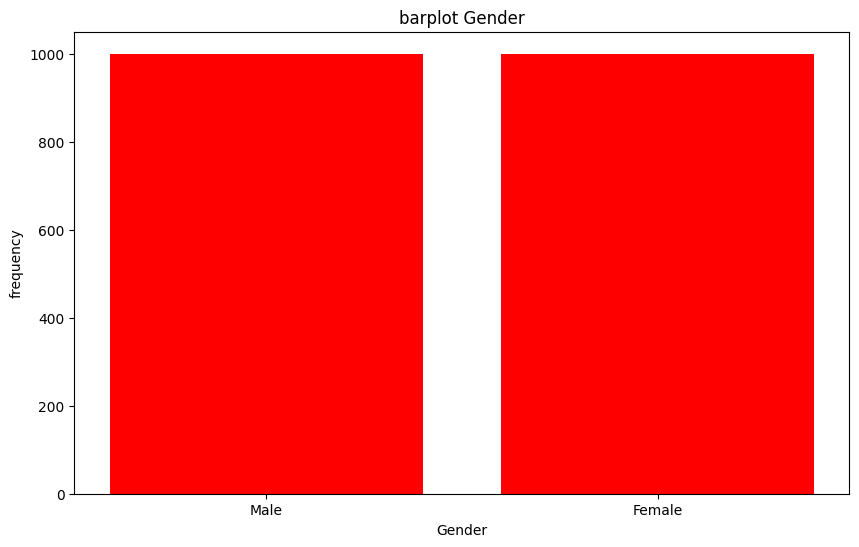

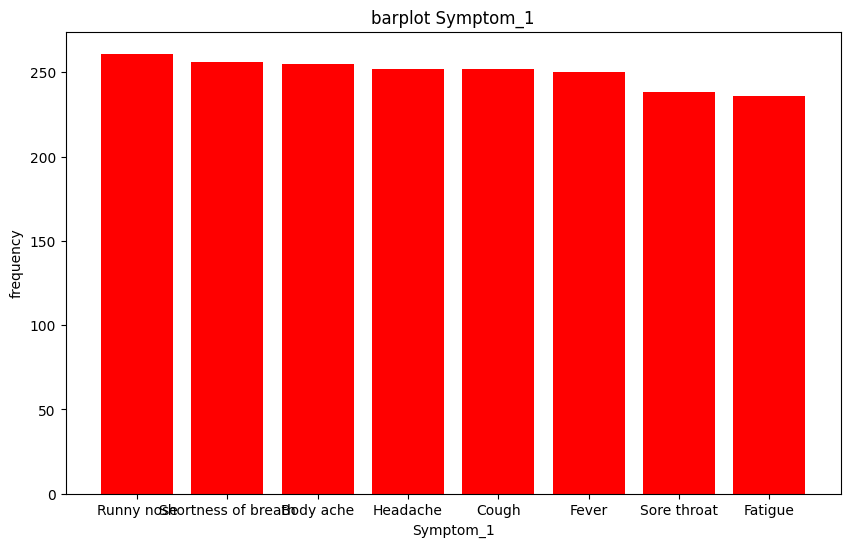

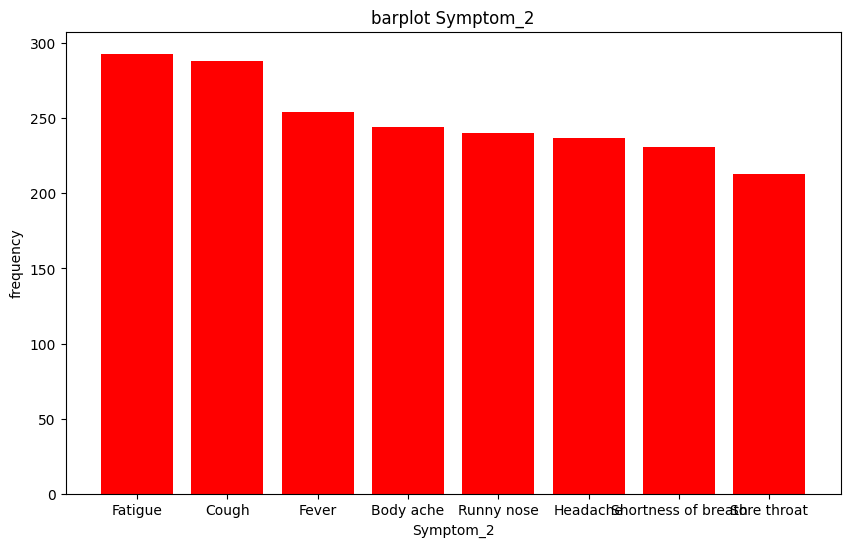

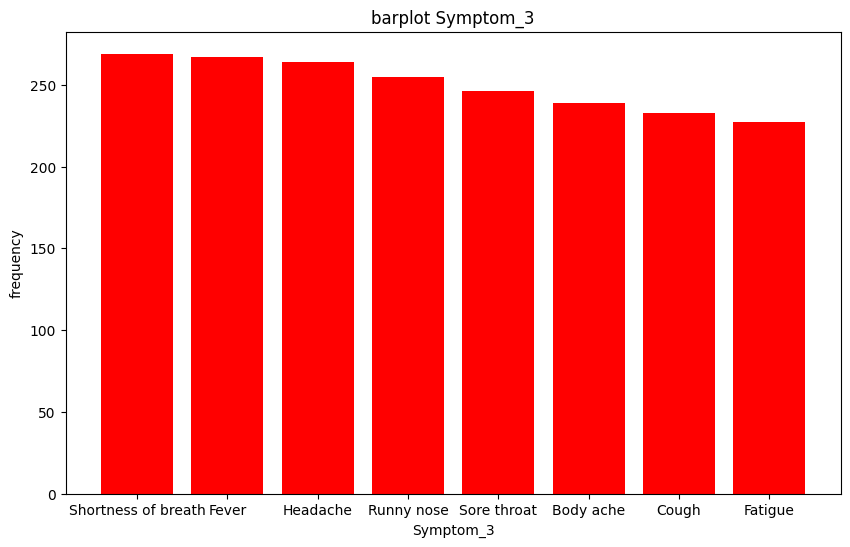

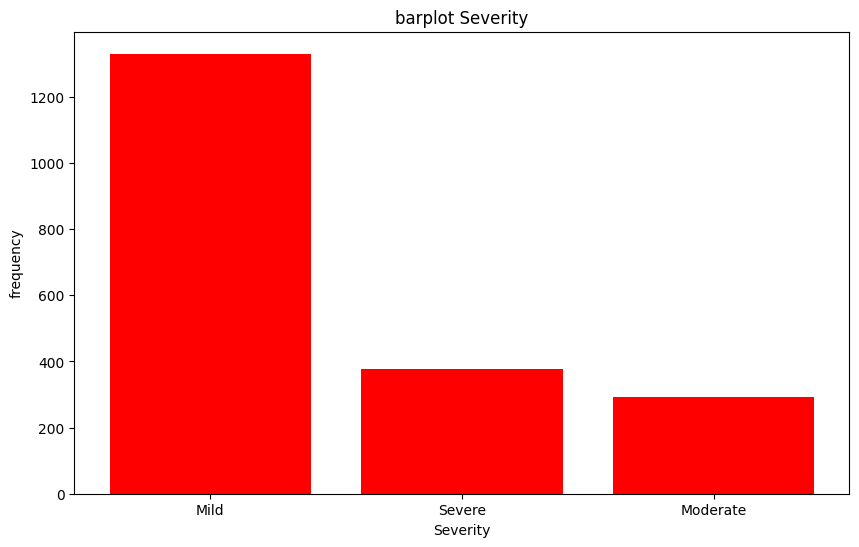

In [116]:

for col in obj_cols:
    plt.figure(figsize=(10,6))
    plt.bar(df[col].value_counts().index, df[col].value_counts().values, color='red' )
    plt.title(f'barplot {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

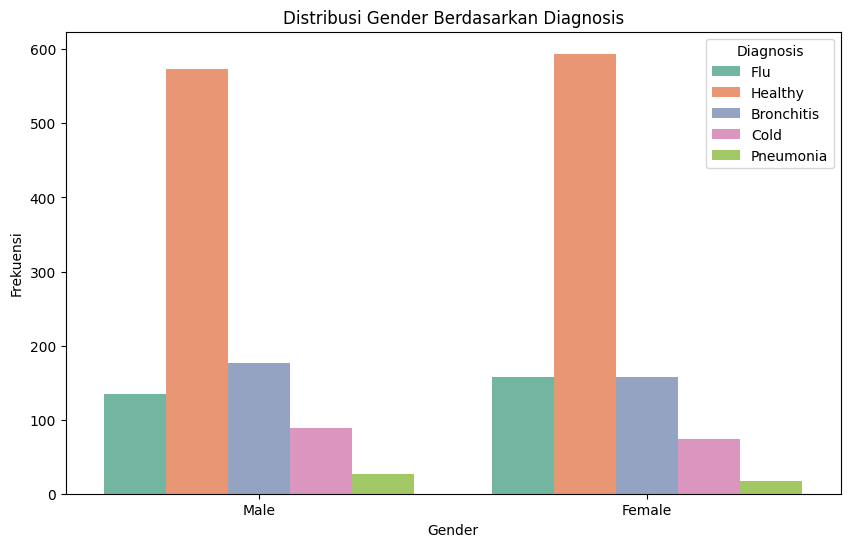

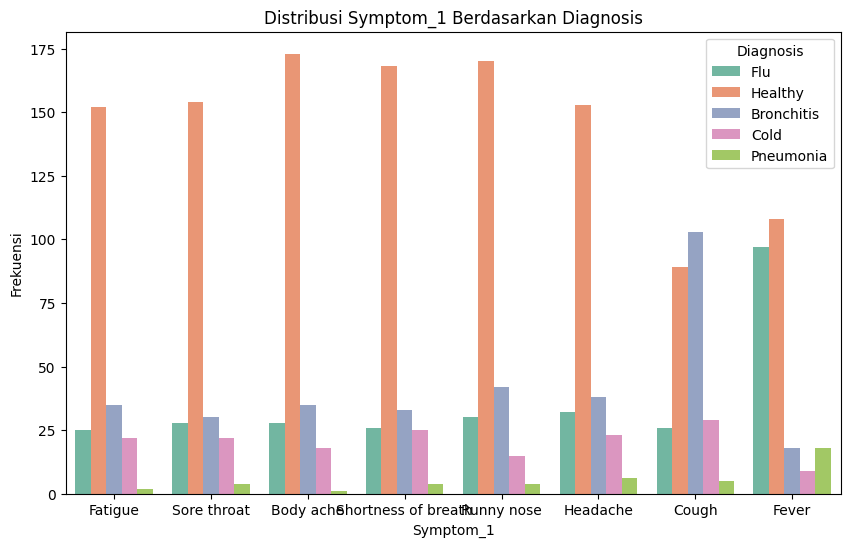

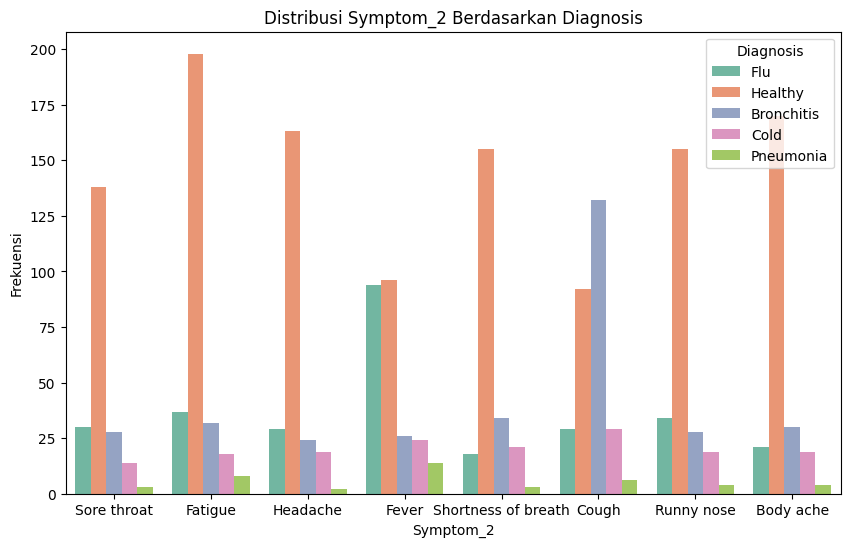

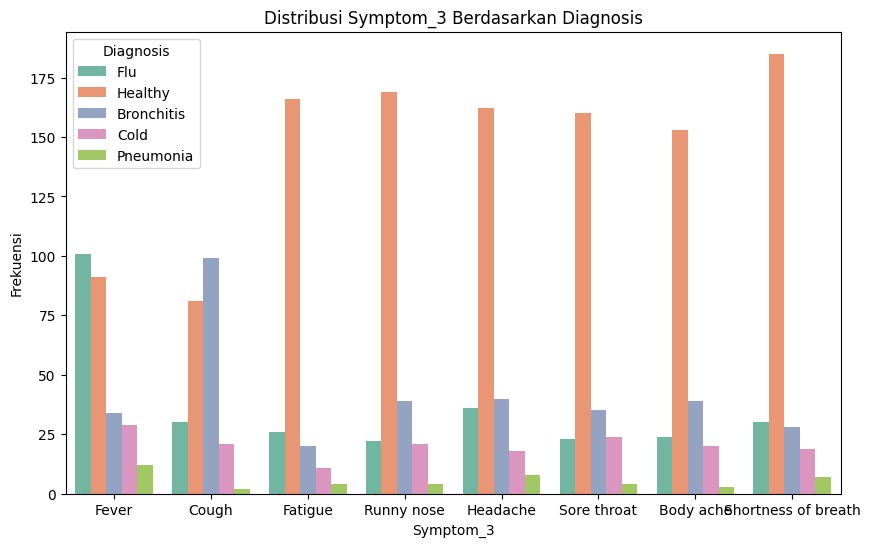

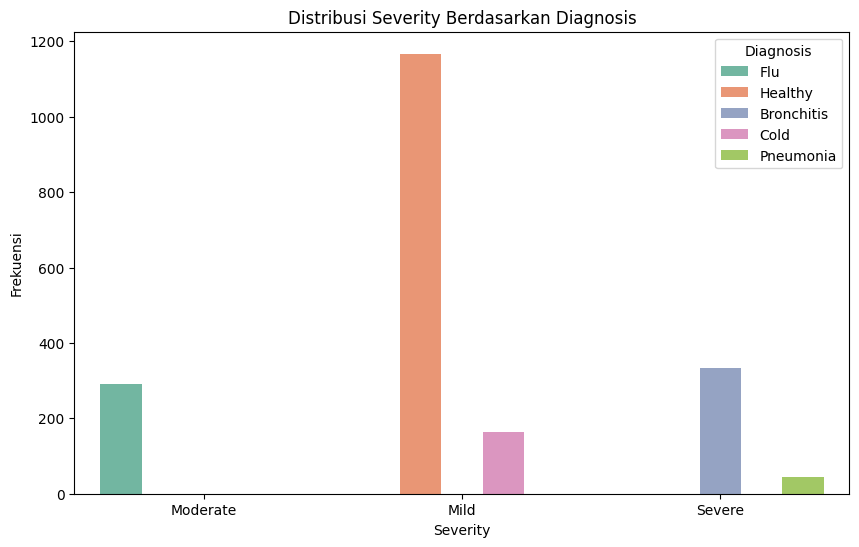

In [117]:
for col in obj_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Diagnosis', palette='Set2')
    plt.title(f'Distribusi {col} Berdasarkan Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.legend(title='Diagnosis')
    plt.show()

In [118]:
numeric_cols=df.select_dtypes(include=['float64','int64']).columns.tolist()

In [119]:
numeric_cols

['Age',
 'Heart_Rate_bpm',
 'Body_Temperature_C',
 'Oxygen_Saturation_%',
 'BP_ration']

In [120]:
df['Age'].nunique()

62

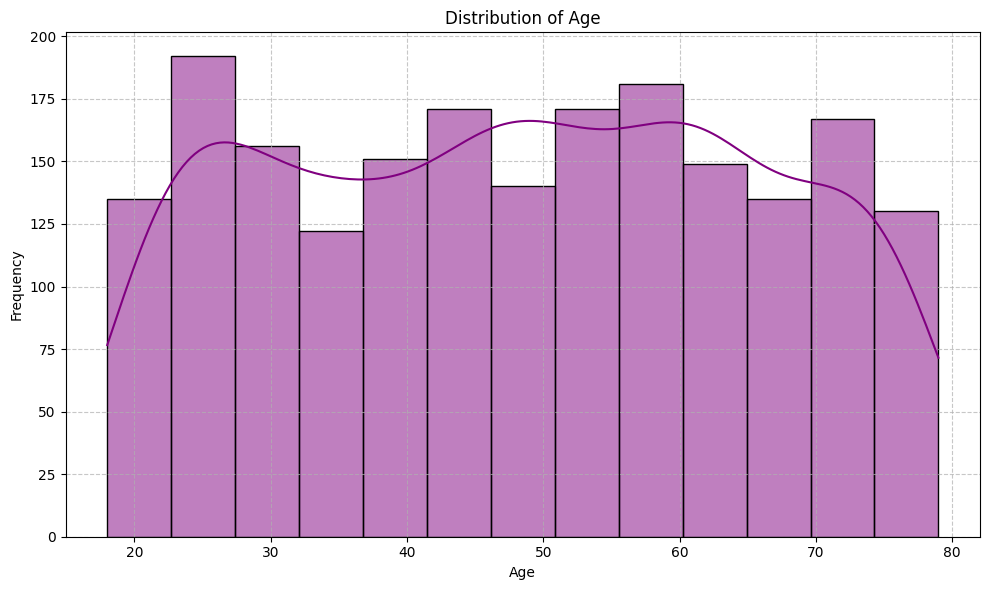

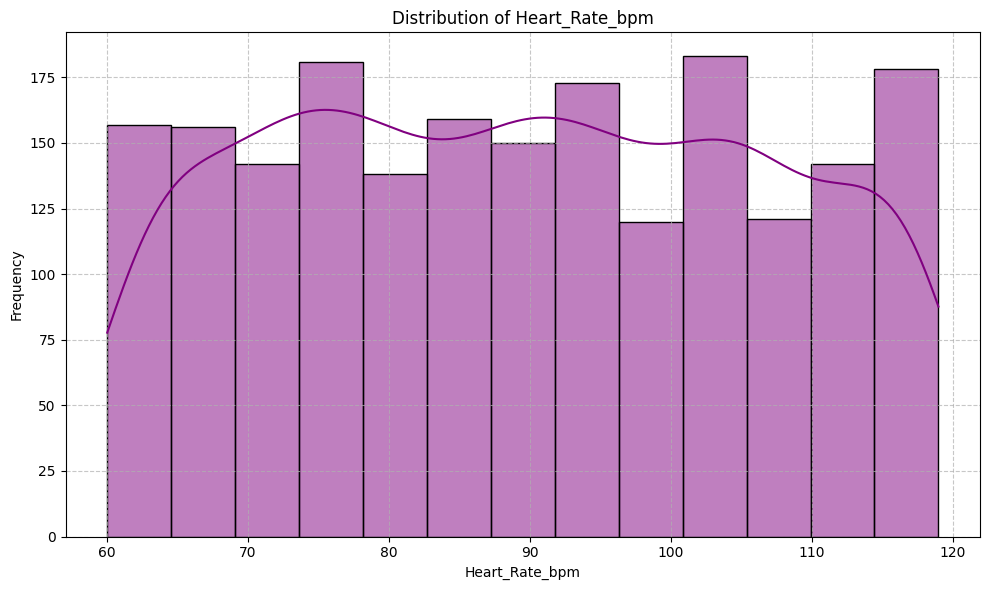

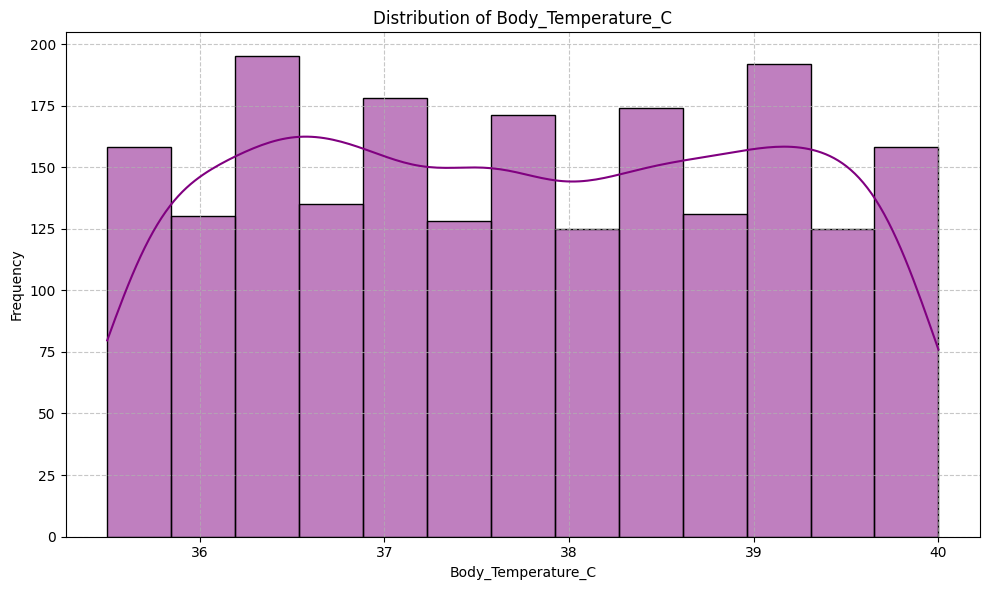

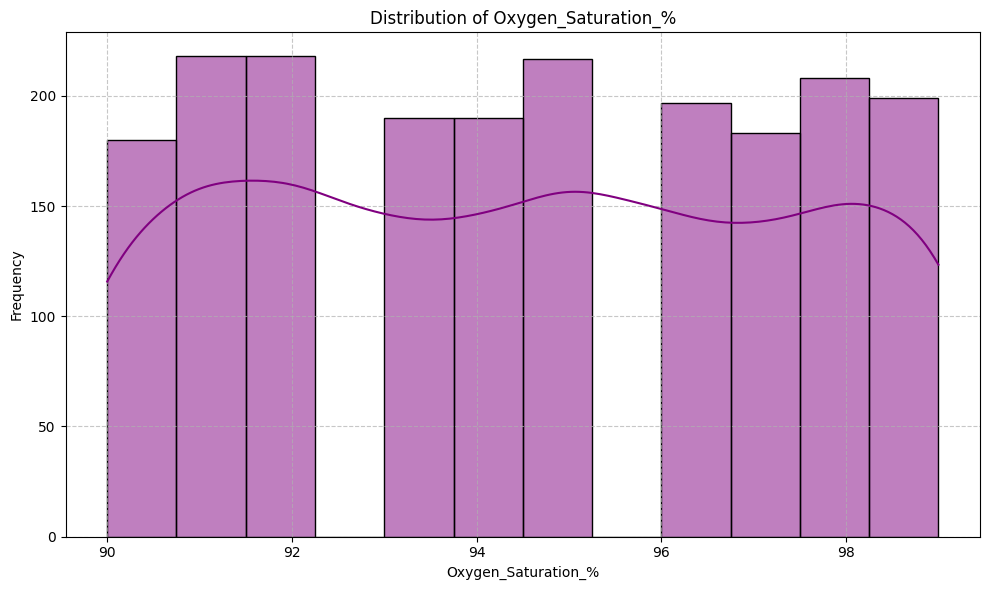

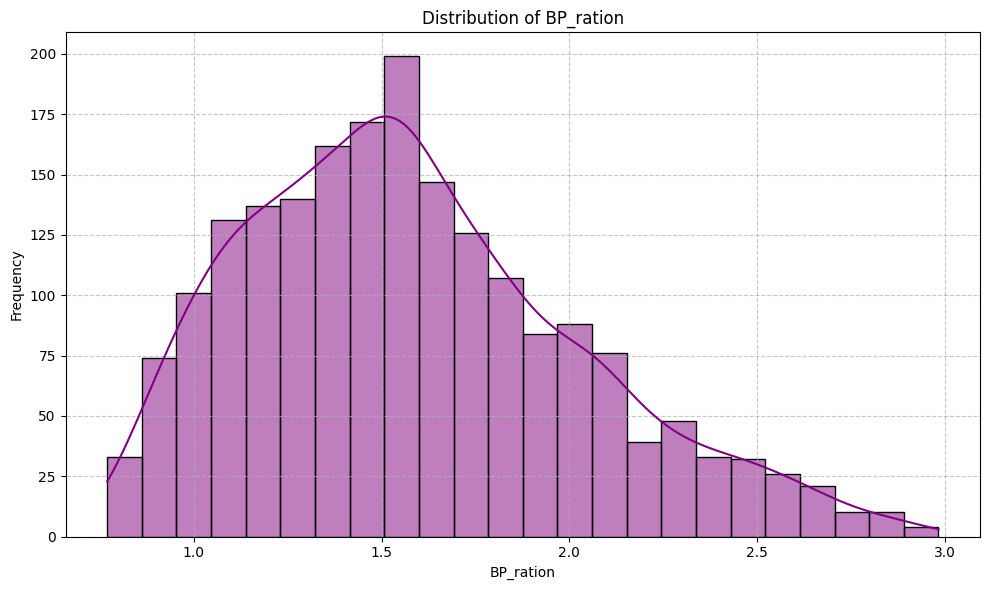

In [121]:
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True, color='purple')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [122]:
df['BP_ration'].skew()

np.float64(0.5876876032876215)

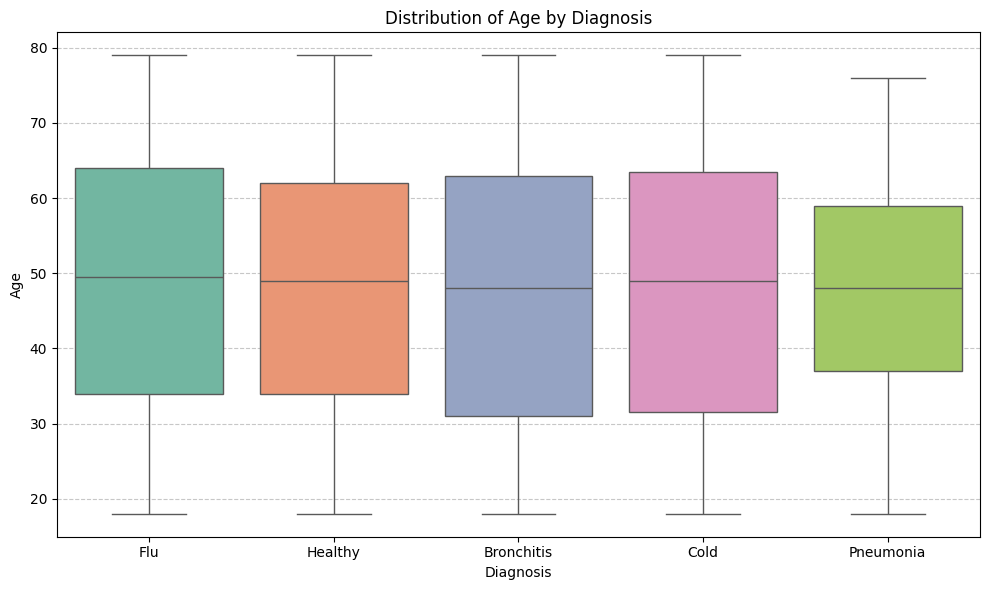

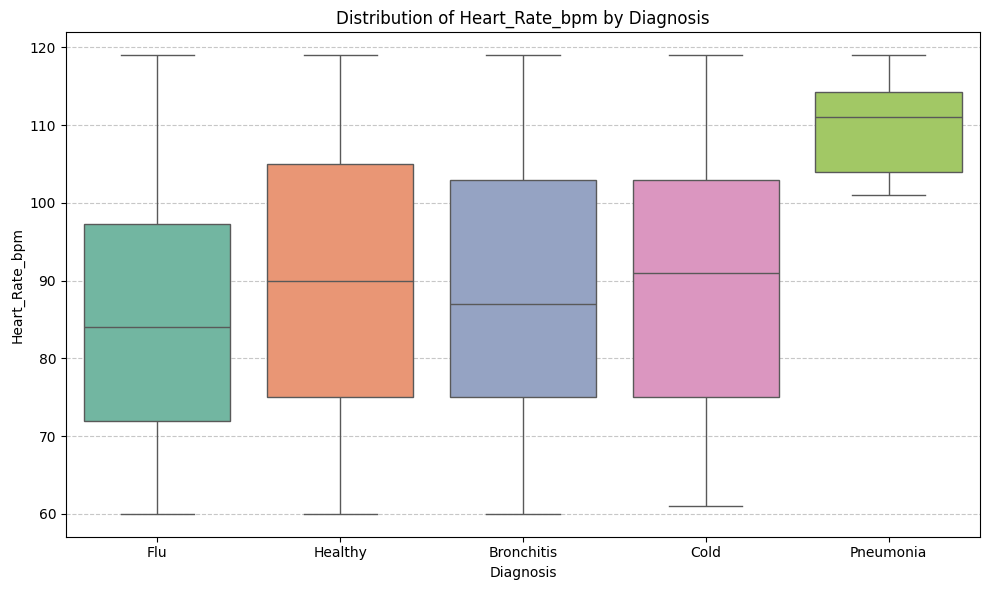

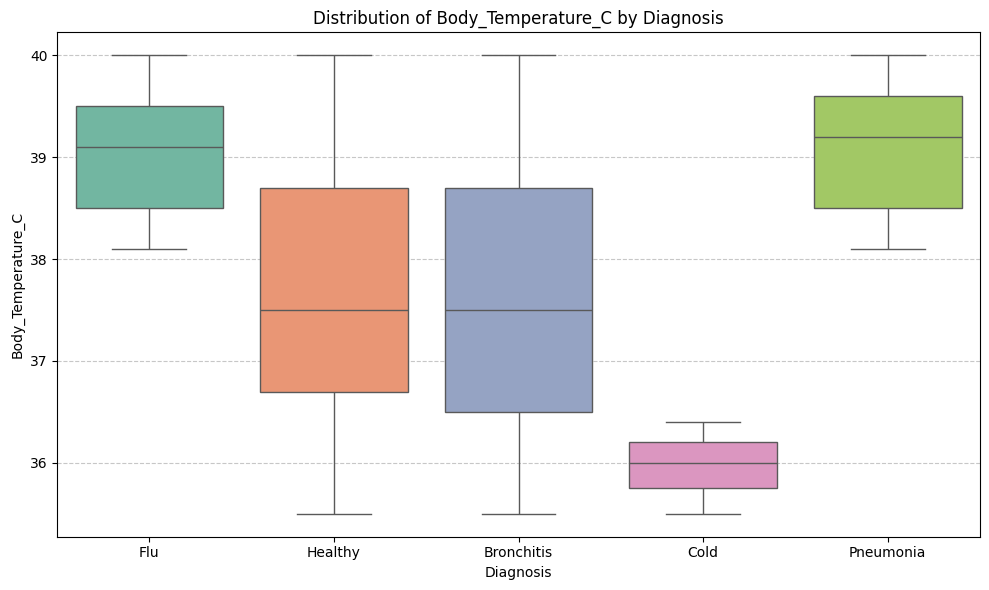

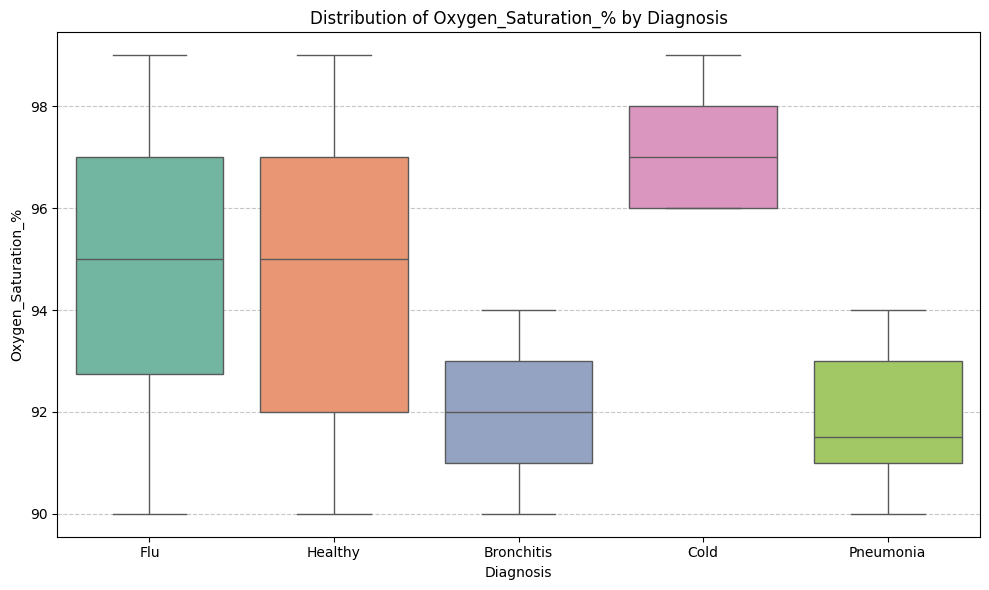

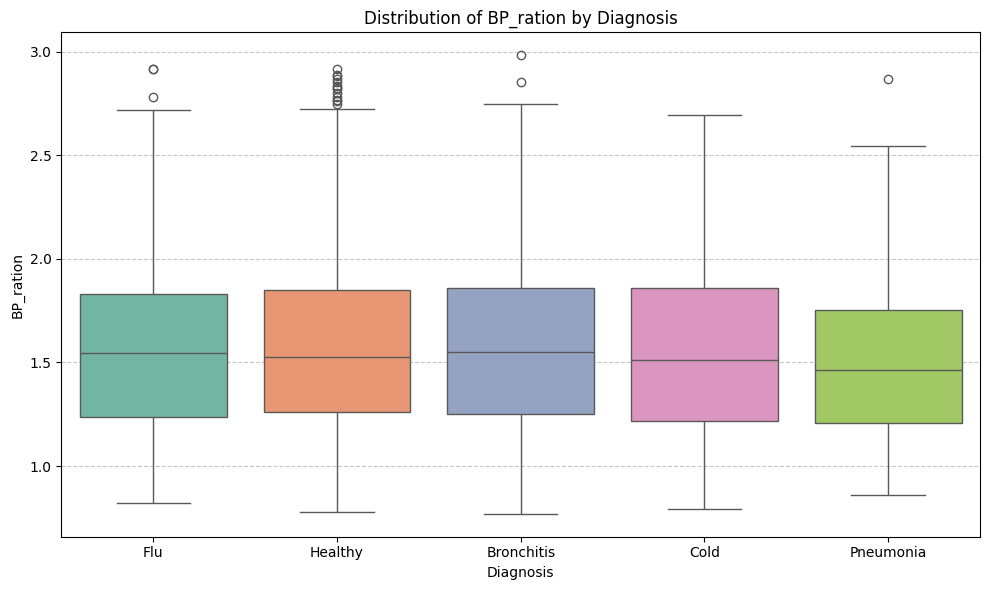

In [123]:
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=target, y=col, hue=target, palette='Set2')
    plt.title(f'Distribution of {col} by {target}')
    plt.xlabel(target)
    plt.ylabel(col)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [124]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

print(f"q1:{Q1}, q2:{Q3}")

q1:33.0, q2:63.0


In [125]:
df.columns

Index(['Age', 'Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Heart_Rate_bpm', 'Body_Temperature_C', 'Blood_Pressure_mmHg',
       'Oxygen_Saturation_%', 'Diagnosis', 'Severity', 'Treatment_Plan',
       'BP_ration'],
      dtype='object')

In [126]:
df.drop(columns='Blood_Pressure_mmHg', inplace=True)

In [127]:
print(df.groupby('Diagnosis')['Oxygen_Saturation_%'].describe())

             count       mean       std   min    25%   50%   75%   max
Diagnosis                                                             
Bronchitis   334.0  91.949102  1.369043  90.0  91.00  92.0  93.0  94.0
Cold         163.0  97.453988  1.123280  96.0  96.00  97.0  98.0  99.0
Flu          292.0  94.941781  2.745825  90.0  92.75  95.0  97.0  99.0
Healthy     1167.0  94.795201  2.809573  90.0  92.00  95.0  97.0  99.0
Pneumonia     44.0  91.863636  1.407470  90.0  91.00  91.5  93.0  94.0


In [128]:
df.columns

Index(['Age', 'Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Heart_Rate_bpm', 'Body_Temperature_C', 'Oxygen_Saturation_%',
       'Diagnosis', 'Severity', 'Treatment_Plan', 'BP_ration'],
      dtype='object')

In [129]:
df.dtypes

,0
Age,int64
Gender,object
Symptom_1,object
Symptom_2,object
Symptom_3,object
Heart_Rate_bpm,int64
Body_Temperature_C,float64
Oxygen_Saturation_%,int64
Diagnosis,object
Severity,object


In [130]:
for col in obj_cols:
    print(df[col].value_counts())
    print('-'*40)

Gender
Male      1000
Female    1000
Name: count, dtype: int64
----------------------------------------
Symptom_1
Runny nose             261
Shortness of breath    256
Body ache              255
Headache               252
Cough                  252
Fever                  250
Sore throat            238
Fatigue                236
Name: count, dtype: int64
----------------------------------------
Symptom_2
Fatigue                293
Cough                  288
Fever                  254
Body ache              244
Runny nose             240
Headache               237
Shortness of breath    231
Sore throat            213
Name: count, dtype: int64
----------------------------------------
Symptom_3
Shortness of breath    269
Fever                  267
Headache               264
Runny nose             255
Sore throat            246
Body ache              239
Cough                  233
Fatigue                227
Name: count, dtype: int64
----------------------------------------
Severity
Mild    

In [131]:
# 1. Gender: cukup map ke 0/1
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# 2. Severity: ordinal encoding manual
df['Severity'] = df['Severity'].map({'Mild': 0, 'Moderate': 1, 'Severe': 2})

# 3. Gejala: one-hot encoding untuk setiap kolom
symptom_cols = ['Symptom_1', 'Symptom_2', 'Symptom_3']
df = pd.get_dummies(df, columns=symptom_cols, prefix='Symptom')

In [132]:
df.head()

,Age,Gender,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan,BP_ration,Symptom_Body ache,...,Symptom_Shortness of breath,Symptom_Sore throat,Symptom_Body ache,Symptom_Cough,Symptom_Fatigue,Symptom_Fever,Symptom_Headache,Symptom_Runny nose,Symptom_Shortness of breath,Symptom_Sore throat
0,74,1,69,39.4,94,Flu,1,Medication and rest,1.450549,False,...,False,True,False,False,False,True,False,False,False,False
1,66,0,95,39.0,98,Healthy,0,Rest and fluids,1.775510,False,...,False,False,False,True,False,False,False,False,False,False
2,32,1,77,36.8,96,Healthy,0,Rest and fluids,2.266667,True,...,False,True,False,False,True,False,False,False,False,False
3,21,0,72,38.9,99,Healthy,0,Rest and fluids,1.792683,False,...,False,False,False,True,False,False,False,False,False,False
4,53,1,100,36.6,92,Healthy,0,Rest and fluids,1.028302,False,...,False,True,False,False,True,False,False,False,False,False


In [133]:
df.columns

Index(['Age', 'Gender', 'Heart_Rate_bpm', 'Body_Temperature_C',
       'Oxygen_Saturation_%', 'Diagnosis', 'Severity', 'Treatment_Plan',
       'BP_ration', 'Symptom_Body ache', 'Symptom_Cough', 'Symptom_Fatigue',
       'Symptom_Fever', 'Symptom_Headache', 'Symptom_Runny nose',
       'Symptom_Shortness of breath', 'Symptom_Sore throat',
       'Symptom_Body ache', 'Symptom_Cough', 'Symptom_Fatigue',
       'Symptom_Fever', 'Symptom_Headache', 'Symptom_Runny nose',
       'Symptom_Shortness of breath', 'Symptom_Sore throat',
       'Symptom_Body ache', 'Symptom_Cough', 'Symptom_Fatigue',
       'Symptom_Fever', 'Symptom_Headache', 'Symptom_Runny nose',
       'Symptom_Shortness of breath', 'Symptom_Sore throat'],
      dtype='object')

In [134]:
df[target].value_counts()

,count
Diagnosis,
Healthy,1167
Bronchitis,334
Flu,292
Cold,163
Pneumonia,44


In [135]:
diagnosis_mapping = {
    'Healthy': 0,
    'Flu': 1,
    'Cold': 2,
    'Bronchitis': 3,
    'Pneumonia': 4
}
df['Diagnosis'] = df['Diagnosis'].map(diagnosis_mapping)

In [136]:
df.head()

,Age,Gender,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan,BP_ration,Symptom_Body ache,...,Symptom_Shortness of breath,Symptom_Sore throat,Symptom_Body ache,Symptom_Cough,Symptom_Fatigue,Symptom_Fever,Symptom_Headache,Symptom_Runny nose,Symptom_Shortness of breath,Symptom_Sore throat
0,74,1,69,39.4,94,1,1,Medication and rest,1.450549,False,...,False,True,False,False,False,True,False,False,False,False
1,66,0,95,39.0,98,0,0,Rest and fluids,1.775510,False,...,False,False,False,True,False,False,False,False,False,False
2,32,1,77,36.8,96,0,0,Rest and fluids,2.266667,True,...,False,True,False,False,True,False,False,False,False,False
3,21,0,72,38.9,99,0,0,Rest and fluids,1.792683,False,...,False,False,False,True,False,False,False,False,False,False
4,53,1,100,36.6,92,0,0,Rest and fluids,1.028302,False,...,False,True,False,False,True,False,False,False,False,False


In [138]:
df.columns

Index(['Age', 'Gender', 'Heart_Rate_bpm', 'Body_Temperature_C',
       'Oxygen_Saturation_%', 'Diagnosis', 'Severity', 'Treatment_Plan',
       'BP_ration', 'Symptom_Body ache', 'Symptom_Cough', 'Symptom_Fatigue',
       'Symptom_Fever', 'Symptom_Headache', 'Symptom_Runny nose',
       'Symptom_Shortness of breath', 'Symptom_Sore throat',
       'Symptom_Body ache', 'Symptom_Cough', 'Symptom_Fatigue',
       'Symptom_Fever', 'Symptom_Headache', 'Symptom_Runny nose',
       'Symptom_Shortness of breath', 'Symptom_Sore throat',
       'Symptom_Body ache', 'Symptom_Cough', 'Symptom_Fatigue',
       'Symptom_Fever', 'Symptom_Headache', 'Symptom_Runny nose',
       'Symptom_Shortness of breath', 'Symptom_Sore throat'],
      dtype='object')

In [140]:
df.dtypes

,0
Age,int64
Gender,int64
Heart_Rate_bpm,int64
Body_Temperature_C,float64
Oxygen_Saturation_%,int64
Diagnosis,int64
Severity,int64
Treatment_Plan,object
BP_ration,float64
Symptom_Body ache,bool


In [ ]:
duplicated_cols = df.columns[df.columns.duplicated()]
print("duplicate column:")
print(duplicated_cols.tolist())

Kolom duplikat:
['Symptom_Body ache', 'Symptom_Cough', 'Symptom_Fatigue', 'Symptom_Fever', 'Symptom_Headache', 'Symptom_Runny nose', 'Symptom_Shortness of breath', 'Symptom_Sore throat', 'Symptom_Body ache', 'Symptom_Cough', 'Symptom_Fatigue', 'Symptom_Fever', 'Symptom_Headache', 'Symptom_Runny nose', 'Symptom_Shortness of breath', 'Symptom_Sore throat']


In [147]:
df = df.loc[:, ~df.columns.duplicated()].copy()

In [148]:
symptom_cols = [col for col in df.columns if col.startswith('Symptom_')]
df[symptom_cols] = df[symptom_cols].astype(int)

In [149]:
df.dtypes

,0
Age,int64
Gender,int64
Heart_Rate_bpm,int64
Body_Temperature_C,float64
Oxygen_Saturation_%,int64
Diagnosis,int64
Severity,int64
Treatment_Plan,object
BP_ration,float64
Symptom_Body ache,int64


In [150]:
df['Treatment_Plan'].value_counts()

,count
Treatment_Plan,
Rest and fluids,1330
Hospitalization and medication,378
Medication and rest,292


In [151]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None) 

treatment_encoded = encoder.fit_transform(df[['Treatment_Plan']])

treatment_names = encoder.get_feature_names_out(['Treatment_Plan'])

df_treatment = pd.DataFrame(treatment_encoded, columns=treatment_names, index=df.index)


df = pd.concat([df, df_treatment], axis=1)
df = df.drop('Treatment_Plan', axis=1)

In [153]:
Y=df[target]
X=df.drop(columns=target)

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [158]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
import pandas as pd

class ModelComparasi:
    def __init__(self):
        self.pipelines = {}
        self.results = {}
    
    def add_pipeline(self, name, pipeline):
        """Tambah pipeline (preprocessing + model)"""
        self.pipelines[name] = pipeline
    
    def fit_all(self, X_train, y_train):
        """Latih semua pipeline"""
        for name, pipe in self.pipelines.items():
            print(f"Training {name}...")
            pipe.fit(X_train, y_train)
    
    def evaluate_all(self, X_test, y_test, metric='f1_macro'):
        """Evaluasi semua model dan simpan hasil"""
        results = {}
        for name, pipe in self.pipelines.items():
            y_pred = pipe.predict(X_test)
            if metric == 'accuracy':
                score = accuracy_score(y_test, y_pred)
            elif metric == 'f1_macro':
                score = f1_score(y_test, y_pred, average='macro')
            else:
                # Bisa tambahkan metrik lain
                score = f1_score(y_test, y_pred, average=metric)
            
            results[name] = score
            print(f"\n{name} - {metric}: {score:.4f}")
            print(classification_report(y_test, y_pred))
        
        self.results = results
        return pd.Series(results).sort_values(ascending=False)
    
    def get_best_model(self):
        """Kembalikan model terbaik berdasarkan hasil evaluasi"""
        if not self.results:
            raise ValueError("Belum ada evaluasi. Jalankan evaluate_all() dulu.")
        best_name = max(self.results, key=self.results.get)
        return best_name, self.pipelines[best_name]


In [163]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'AdaBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', AdaBoostClassifier(random_state=42))
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ]),
    'Gaussian Naive Bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            random_state=42,
            eval_metric='mlogloss' 
        ))
    ])
}

In [164]:
# Inisialisasi komparator
comparator = ModelComparasi()

# Tambahkan semua pipeline
for name, pipe in pipelines.items():
    comparator.add_pipeline(name, pipe)

# Latih semua model
comparator.fit_all(X_train, Y_train)

# Evaluasi dengan F1-macro (rekomendasi untuk data imbalance)
results = comparator.evaluate_all(X_test, Y_test, metric='f1_macro')

# Tampilkan peringkat
print("\n" + "="*50)
print("PERINGKAT MODEL (F1-MACRO):")
print("="*50)
print(results)

Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training AdaBoost...
Training K-Nearest Neighbors...
Training Gaussian Naive Bayes...
Training XGBoost...

Logistic Regression - f1_macro: 0.8588
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       233
           1       1.00      1.00      1.00        58
           2       0.59      1.00      0.74        33
           3       0.98      0.90      0.94        67
           4       0.53      0.89      0.67         9

    accuracy                           0.92       400
   macro avg       0.82      0.94      0.86       400
weighted avg       0.95      0.92      0.93       400


Random Forest - f1_macro: 0.8486
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        33
           3       0.90   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [165]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(pipelines['XGBoost'], param_grid, cv=3, scoring='f1_macro')
grid.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='mlogloss',
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      g...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=5,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1_macro')

In [166]:
best_pipeline = grid.best_estimator_

# Tampilkan parameter terbaik
print("Best parameters:")
print(grid.best_params_)

# Tampilkan skor terbaik (F1-macro rata-rata dari CV)
print(f"\nBest CV score: {grid.best_score_:.4f}")

Best parameters:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}

Best CV score: 0.9345


In [167]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
import pandas as pd

# Siapkan data (pastikan Y adalah label asli, bisa string atau angka)
X = df.drop(columns=[target])
Y = df[target]

# Atur Stratified K-Fold (misal: 5 fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Simpan hasil
results = {}

# Evaluasi setiap pipeline
for name, pipe in pipelines.items():
    print(f"Evaluating {name}...")
    
    # Lakukan cross-validation
    scores = cross_val_score(
        pipe, 
        X, Y, 
        cv=cv, 
        scoring='f1_macro',  # penting untuk imbalance!
        n_jobs=-1  # gunakan semua CPU
    )
    
    results[name] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }
    
    print(f"  F1-macro: {scores.mean():.4f} ± {scores.std():.4f}\n")

# Konversi ke DataFrame untuk tampilan rapi
results_df = pd.DataFrame(results).T[['mean', 'std']].sort_values('mean', ascending=False)
print("\n" + "="*50)
print("PERINGKAT MODEL (Stratified 5-Fold CV, F1-Macro)")
print("="*50)
print(results_df)

Evaluating Logistic Regression...
  F1-macro: 0.8601 ± 0.0226

Evaluating Random Forest...
  F1-macro: 0.8906 ± 0.0365

Evaluating Gradient Boosting...
  F1-macro: 0.9156 ± 0.0105

Evaluating AdaBoost...
  F1-macro: 0.6991 ± 0.0033

Evaluating K-Nearest Neighbors...
  F1-macro: 0.7272 ± 0.0294

Evaluating Gaussian Naive Bayes...
  F1-macro: 0.8294 ± 0.0215

Evaluating XGBoost...
  F1-macro: 0.9184 ± 0.0141


PERINGKAT MODEL (Stratified 5-Fold CV, F1-Macro)
                          mean       std
XGBoost               0.918412  0.014113
Gradient Boosting     0.915649  0.010548
Random Forest         0.890621  0.036523
Logistic Regression   0.860147  0.022564
Gaussian Naive Bayes  0.829423  0.021529
K-Nearest Neighbors   0.727152  0.029444
AdaBoost              0.699117  0.003269
